1. Realizar un análisis exploratorio de los datos para comprender las características y la
distribución de los datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


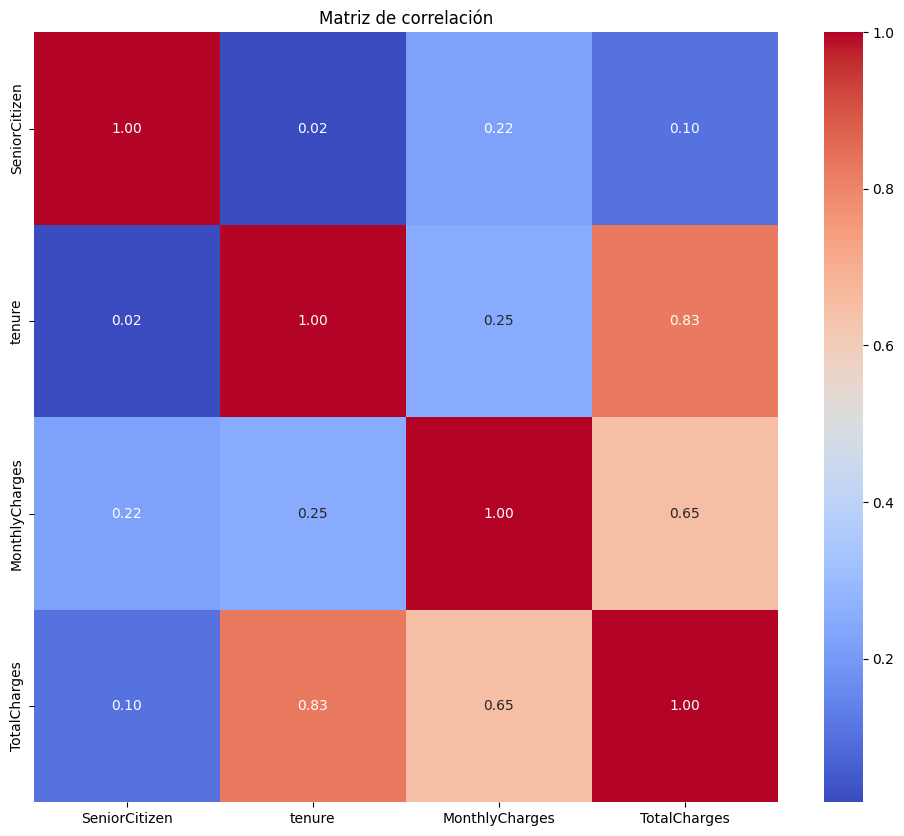

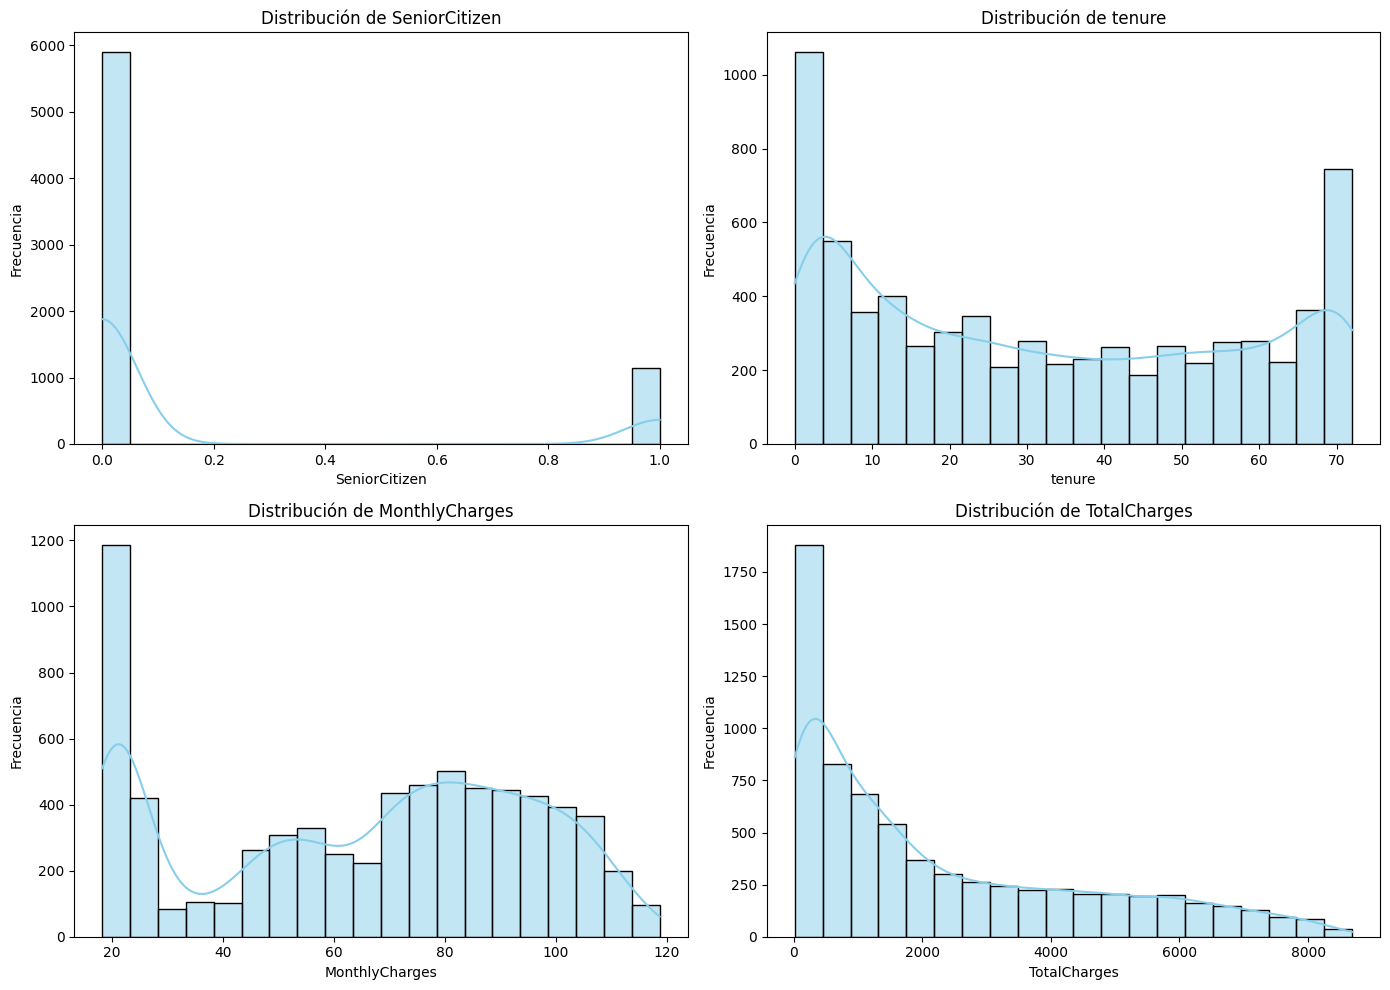

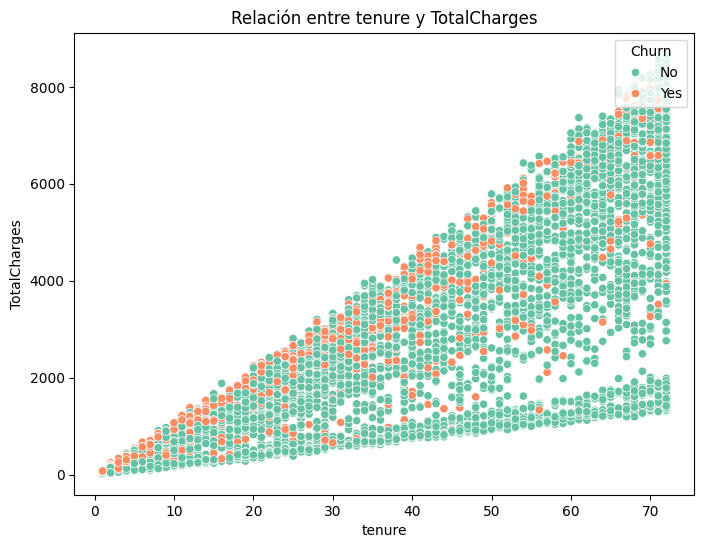

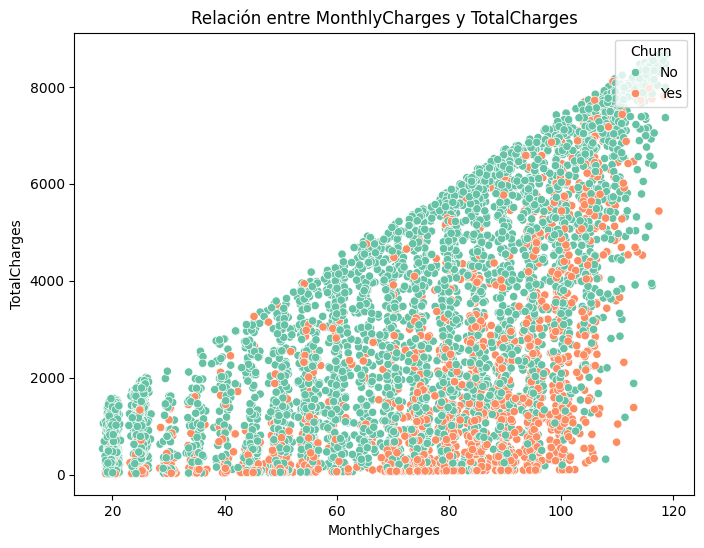

'Al graficar y probar con diferentes metodos de graficos distributivos concluyo que la correlación de tenure y totalcharges de 0.83 es correcta \npero la de monthly con total no les veo tanta correlación como se indica que es de 0.83, sin embargo si hay correlación.'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_excel("Telco-Customer-Churn.xlsx")
#FernandoSanchez Verificar la información del DataFrame
print(data.info())

#FernandoSanchez Exploración inicial de datos
print("Dimensiones del dataset:", data.shape)
print("\nTipos de variables:")
print(data.dtypes)
print("\nValores faltantes:")
print(data.isnull().sum())
print("\nEstadísticas descriptivas:")
print(data.describe())

#FernandoSanchez Matriz de correlación (solo para variables numéricas)
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

#FernandoSanchez Visualizar las distribuciones de las variables numéricas
plt.figure(figsize=(14, 10))

#FernandoSanchez Histogramas para las variables numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, color='skyblue', bins=20)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

#FernandoSanchez Gráfico de dispersión para comparar tenure y TotalCharges
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='tenure', y='TotalCharges', hue='Churn', palette='Set2')
plt.title('Relación entre tenure y TotalCharges')
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
plt.legend(title='Churn', loc='upper right')
plt.show()

#FernandoSanchez Gráfico de dispersión para comparar MonthlyCharges y TotalCharges
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='MonthlyCharges', y='TotalCharges', hue='Churn', palette='Set2')
plt.title('Relación entre MonthlyCharges y TotalCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.legend(title='Churn', loc='upper right')
plt.show()

"""Al graficar y probar con diferentes metodos de graficos distributivos concluyo que la correlación de tenure y totalcharges de 0.83 es correcta 
pero la de monthly con total no les veo tanta correlación como se indica que es de 0.83, sin embargo si hay correlación."""

2. Preprocesar los datos, incluyendo la limpieza, la transformación y la normalización
de las características según sea necesario.

In [5]:

#FernandoSanchez Eliminar filas con valores faltantes
data.dropna(inplace=True)

#FernandoSanchez Identificar características numéricas y categóricas
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['object']).columns

#FernandoSanchez Definir preprocesadores para características numéricas y categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

#FernandoSanchez Crear un preprocesador para aplicar transformaciones según el tipo de característica
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#FernandoSanchez Aplicar preprocesamiento a los datos
X_processed = preprocessor.fit_transform(data)

#FernandoSanchez Mostrar las dimensiones del conjunto de datos procesado
print("Dimensiones del conjunto de datos procesado:", X_processed.shape)
"""Encontre 11 valores faltantes trate de llenarlos con las modas y medias pero al final era un aproximado y podía alterar los algoritmos, por ende decidi eliminarlos."""

Dimensiones del conjunto de datos procesado: (7032, 7079)


'Encontre 11 valores faltantes trate de llenarlos con las modas y medias pero al final era un aproximado y podía alterar los algoritmos, por ende decidi eliminarlos.'

3. Dividir los datos en conjuntos de entrenamiento y prueba.

In [6]:
#FernandoSanchez Dividir los datos en características (X) y etiquetas (y)
X = X_processed
y = data['Churn']

#FernandoSanchez Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FernandoSanchez Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (5625, 7079) (5625,)
Dimensiones del conjunto de prueba: (1407, 7079) (1407,)


4. Entrenar al menos 3 algoritmos y optimizar sus hiperparametros

In [7]:
#FernandoSanchez Definir los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

#FernandoSanchez Definir los hiperparámetros a ajustar para cada modelo
params = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
     'Random Forest': {'n_estimators': [50, 100], 'max_depth': [None, 5, 10]}
}

#FernandoSanchez Entrenar y ajustar los modelos utilizando GridSearchCV
best_models = {}
for name, model in models.items():
    print(f"Entrenando {name}...")
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Mejores parámetros para {name}: {grid_search.best_params_}")

#FernandoSanchez Evaluar los modelos en el conjunto de prueba
print("\nEvaluación en el conjunto de prueba:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Exactitud: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

"""Con los hiperparametros optimizados,  Parece que los modelos han alcanzado una precisión del 100% en el conjunto de prueba, 
lo que indica que los modelos están prediciendo correctamente tanto las instancias "No" como "Yes" del conjunto de datos de prueba.
En el siguiente requerimento explorare más a fondo realizando una validación cruzada para mitigar sobreajustes."""

Entrenando Logistic Regression...
Mejores parámetros para Logistic Regression: {'C': 0.1}
Entrenando Decision Tree...
Mejores parámetros para Decision Tree: {'max_depth': None}
Entrenando Random Forest...
Mejores parámetros para Random Forest: {'max_depth': None, 'n_estimators': 100}

Evaluación en el conjunto de prueba:
Logistic Regression - Exactitud: 1.0000
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1033
         Yes       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407

Decision Tree - Exactitud: 1.0000
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1033
         Yes       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weig

'Con los hiperparametros optimizados,  Parece que los modelos han alcanzado una precisión del 100% en el conjunto de prueba, \nlo que indica que los modelos están prediciendo correctamente tanto las instancias "No" como "Yes" del conjunto de datos de prueba.\nEn el siguiente requerimento explorare más a fondo realizando una validación cruzada para mitigar sobreajustes.'

5. Evaluar el rendimiento de los modelos utilizando métricas de evaluación pertinentes,
como precisión, sensibilidad, valor F1, entre otras.

In [9]:
#FernandoSanchez Codificar las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
#FernandoSanchez Define las métricas que deseas evaluar
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='binary', pos_label=1),
    'recall': make_scorer(recall_score, average='binary', pos_label=1),
    'f1': make_scorer(f1_score, average='binary', pos_label=1)
}

#FernandoSanchez Realiza validación cruzada para cada modelo
for name, model in models.items():
    print(f"Validación cruzada para {name}:")
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(model, X_train, y_train_encoded, cv=5, scoring=scorer)
        print(f"{metric_name.capitalize()}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

"""Los resultados de la validación cruzada para cada modelo indica un rendimiento muy alto para todos los modelos en los terminos de exactitud, precisión, recall y puntuación F1.
Sin embargo, para random forest, hay una ligera variación en las métricas Accuracy: 0.9984 (+/- 0.0021), Recall: 0.9906 (+/- 0.0123)  y F1: 0.9956 (+/- 0.0066), estas variaciones
en las métricas varian cada que lo volvemos a correr pero no pasan de los ultimos dos decimales es un modelo preciso. """

Validación cruzada para Logistic Regression:
Accuracy: 1.0000 (+/- 0.0000)
Precision: 1.0000 (+/- 0.0000)
Recall: 1.0000 (+/- 0.0000)
F1: 1.0000 (+/- 0.0000)
Validación cruzada para Decision Tree:
Accuracy: 1.0000 (+/- 0.0000)
Precision: 1.0000 (+/- 0.0000)
Recall: 1.0000 (+/- 0.0000)
F1: 1.0000 (+/- 0.0000)
Validación cruzada para Random Forest:
Accuracy: 0.9973 (+/- 0.0037)
Precision: 1.0000 (+/- 0.0000)
Recall: 0.9920 (+/- 0.0080)
F1: 0.9939 (+/- 0.0059)


'Los resultados de la validación cruzada para cada modelo indica un rendimiento muy alto para todos los modelos en los terminos de exactitud, precisión, recall y puntuación F1.\nSin embargo, para random forest, hay una ligera variación en las métricas Accuracy: 0.9984 (+/- 0.0021), Recall: 0.9906 (+/- 0.0123)  y F1: 0.9956 (+/- 0.0066), estas variaciones\nen las métricas varian cada que lo volvemos a correr pero no pasan de los ultimos dos decimales es un modelo preciso. '